## 4주차 과제_0324(월)

파이썬 머신러닝 완벽 가이드 개정 2판 8장 p488~508

# 08. 텍스트 분석

NLP. : 머신이 인간의 언어를 이해하고 해석하는데 더 중점을 두고 기술이 발전됨

텍스트 분석(텍스트 마이닝) : 비정형 텍스트에서 의미 있는 정보를 추출하는 것에 좀 더 중점을 두고 기술이 발전됨

머신러닝, 언어 이해, 통계 등을 활용해 모델을 수립하고 정보를 추출해 비즈니스 인텔리전스나 예측 분석 등의 분석 작업을 주로 수행

- 텍스트 분류 : 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법, 지도학습을 적용함

- 감정 분석 : 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법, 지도/비지도학습 모두 적용

- 텍스트 요약 : 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법

- 텍스트 군집화와 유사도 측정 : 비슷한 유형의 문서에 대해 군집화를 수행하는 기법

## 텍스트 분석 이해

텍스트 분석 : 비정형 데이터인 텍스트를 분석하는 것

머신러닝 알고리즘은 숫자형의 피처 기반 데이터만 입력 받을 수 있음
→ 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미 있는 값을 부여하는 것이 중요

> 텍스트를 변환하는 것을 피처 벡터화 또는 피처 추출이라고 함

### 텍스트 분석 수행 프로세스

1. 텍스트 사전 준비 작업(텍스트 전처리)
    
    - 클렌징 작업 : 대/소문자 변경, 특수문자 삭제등

    - 토큰화 작업

    - 의미 없는 단어 제거 작업

    - 어근 추출

2. 피처 벡터화/추출

3. ML 모델 수립 및 학습/예측/평가

### 파이썬 기반의 NLP, 텍스트 분석 패키지

- NLTK(Natural Language Toolkit for Python)

- Gensim

- Spacy


## 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화

### **클렌징**


텍스트에서 분석에 오히려 방해 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업

### **텍스트 토큰화**

문장 토큰화 : 문서에서 문장을 분리

> 문장의 마침표(.), 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적

> 정규 표현식에 따른 문장 토큰화도 가능

In [2]:
# NLTK에서 일반적으로 많이 쓰이는 sent_tokenize 사용해 토근화 수행
from nltk import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the required 'punkt_tab' data

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


단어 토큰화 : 문장에서 단어를 토큰으로 분리

> 일반적으로 공백, 콤마(,),, 마침표(.), 개행문자 등으로 단어를 분리하지만 정규 표현식을 이용해 다양한 유형으로 토큰화 수행 가능

In [3]:
from nltk import word_tokenize

sentence = 'The Matrix is everywhere its all around us, here even in this room.'
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [4]:
# sent_tokenize와 word_tokenize를 조합해 문서에 대해 단어 토근화 진행
from nltk import word_tokenize, sent_tokenize

# 여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


### **스톱 워드 제거**

스톱 워드 : 분석에 큰 의미 없는 단어

문법 특성상 빈번하게 등장하여 중요하지 않은 단어가 중요 단어로 인지될 수 있음 > 제거하는 것이 매우 중요

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


In [10]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []

# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words = []
    # 개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
    for word in sentence :
        # 소문자로 모두 변환
        word = word.lower()
        # 토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords :
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### **Stemming과 Lemmatization**

문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것

- Lemmatization

    더 정교하고 의미론적인 기반에서 단어의 원형을 찾음

    품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아줌

    변환에 더 오랜 시간이 걸림

- Stemming

    원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용

    원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향이 있음

In [11]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [12]:
# 단어의 품사를 입력해줘야함
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


## Bag of Words - BOW

문서가 가지는 모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델

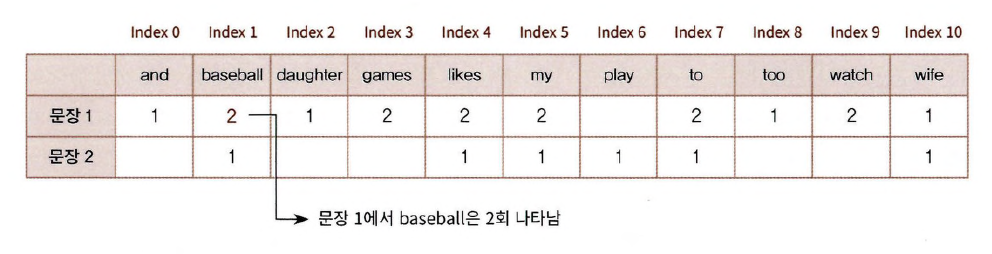

<장점>

쉽고 빠른 구축

단순히 단어의 발생 횟수에 기반하지만 문서의 특징을 잘 나타내는 모델임

<단점>

문맥 의미 반영 부족

희소 행렬 문제

### BOW 피처 벡터화

피처 벡터화 : 텍스트를 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환하는 것

BOW 모델에서의 피처 벡터화

모든 문서에서 모든 단어를 칼럼 형태로 나열하고 각 문서에서 해당 단어의 횟수나 정규화된 빈도를 값으로 부여하는 데이터 세트 모델로 변경하는 것

- 카운트 기반의 벡터화

    각 문서에서 해당 단어가 나타나는 횟수(count)를 부여하는 경우

    카운트 값이 높을수록 중요한 단어로 인식

- TF-IDF(Term Frequency - inverse Document Frequency) 기반의 벡터화

    카운트 기반에서 문서 특징보다 문장에서 자주 사용하는 단어까지 높은 값을 부여하는 문제를 보완하기 위해 사용됨

    자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식으로 값을 부여함

### 사이킷런의 Count 및 TF-IDF 벡터화 구현 : CountVectorizer, TfidfVectorizer

CountVectorizer

카운트 기반의 벡터화 구현 클래스

피처 벡터화와 텍스트 전처리도 함께 수행함

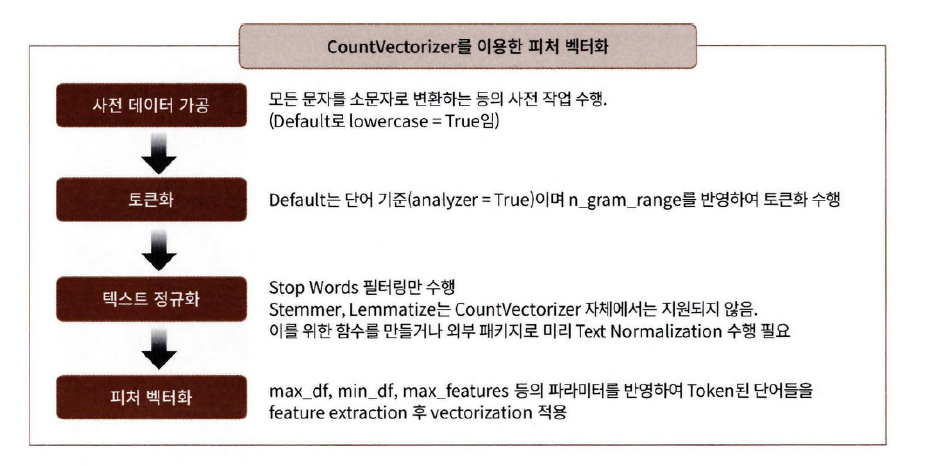

### BOW 벡터화를 위한 희소 행렬

모든 문서에 있는 단어를 추출해 이를 피처로 벡터화하여 만들어지는 대규모의 행렬은 대부분 0값을 가지는 희소 행렬 형태로 나타남

불필요한 0 값이 메모리 공간에 할당되어 많은 메모리 공간을 필요로하며, 행렬의 크기가 커 연산 시에도 데이터 엑세스를 위한 시간이 많이 소모됨

### 희소 행렬 - COO 형식

0이 아닌 데이터만 별도의 데이터 배열에 저장하고 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식

In [13]:
import numpy as np

dense = np.array([[3,0,1], [0,2,0]])

In [14]:
# COO 희소 행렬로 변환하기
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [15]:
# 다시 밀집 형태의 행렬로 출력
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

### 희소 행렬 - CSR 형식

COO 형식이 행과 열의 위치를 나타내기 위해 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식

- COO 형식의 문제점

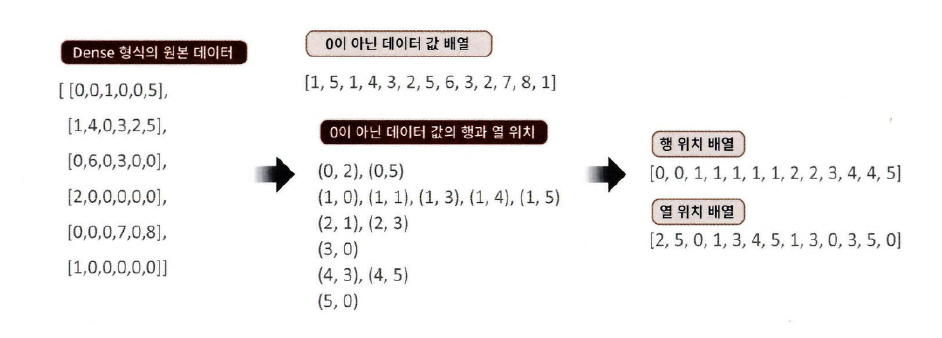

In [16]:
from scipy import sparse

dense2 = np.array([[0, 0, 1, 0, 0, 5],
                    [1, 4, 0, 3, 2, 5],
                    [0, 6, 0, 3, 0, 0],
                    [2, 0, 0, 0, 0, 0],
                    [0, 0, 0, 7, 0, 8],
                    [1, 0, 0, 0, 0, 0]])

#0이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1 ])

#행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

#COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

#행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

#CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))
print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [17]:
# 밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성함
dense3 = np.array([[0, 0, 1, 0, 0, 5],
                    [1, 4, 0, 3, 2, 5],
                    [0, 6, 0, 3, 0, 0],
                    [2, 0, 0, 0, 0, 0],
                    [0, 0, 0, 7, 0, 8],
                    [1, 0, 0, 0, 0, 0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)